In [720]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [721]:
data = pd.read_csv('boston_house_prices.csv');

In [722]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

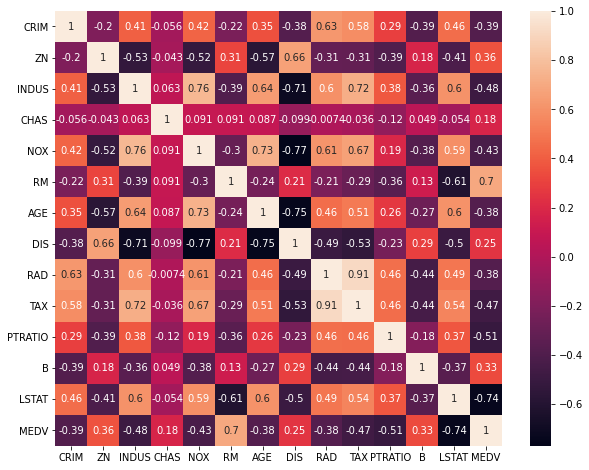

In [723]:
plt.figure(figsize=(10,8))
heat_map_data = data.corr()
sns.heatmap(heat_map_data, annot=True)

> Here `RAD` and `TAX` has the max correlation of 0.91, so we can remove either one of them.

In [724]:
data.drop(columns=['TAX', 'DIS'], inplace=True)

In [725]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,1,21.0,393.45,6.48,22.0


In [727]:
len(data.columns)

12

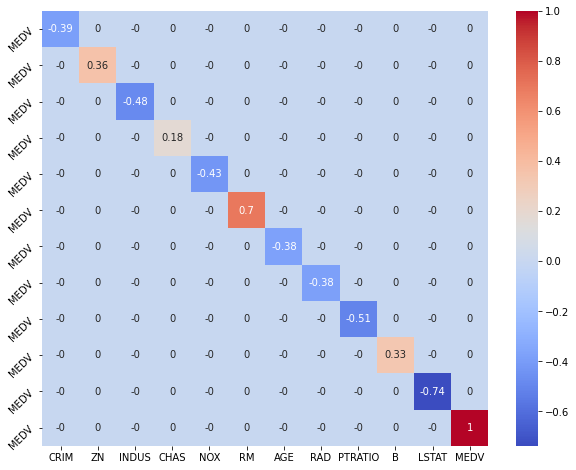

In [728]:
plt.figure(figsize=(10,8))
n_features = len(data.columns)
heat_map_data = (data.corrwith(data.MEDV).values * np.ones((n_features,n_features))) * np.identity(n_features)
g = sns.heatmap(pd.DataFrame(heat_map_data, columns= data.columns, index=['MEDV' for _ in range(len(data.columns))]), annot=True, cmap='coolwarm') 
g.set_yticklabels(g.get_yticklabels(), rotation=45)
plt.show()

> Here the target variable `MEDV` has the least correlation with `CHAS` so it can be removed

In [729]:
data.drop(columns = ['CHAS'], inplace= True)

In [730]:
data

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,1,21.0,393.45,6.48,22.0


> We will now plot the normal distribution for every feature data.

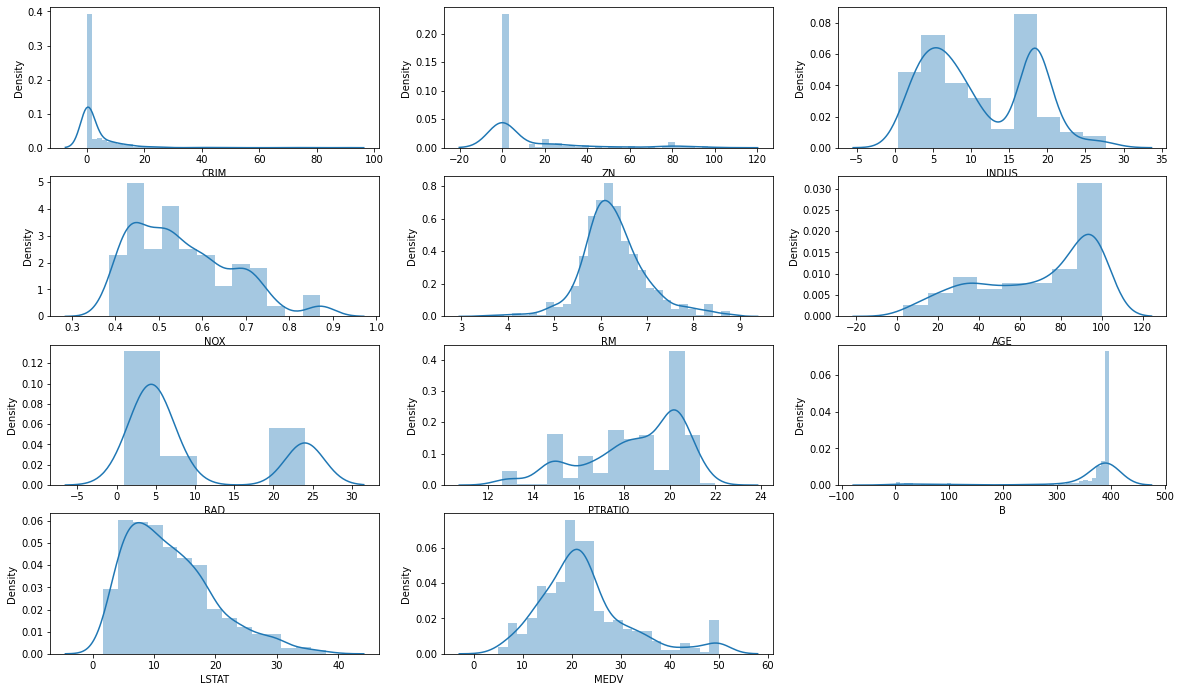

In [731]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15))
for i, column in enumerate(data.columns):
    plt.subplot(5,3,i+1)
    sns.distplot(data[column])

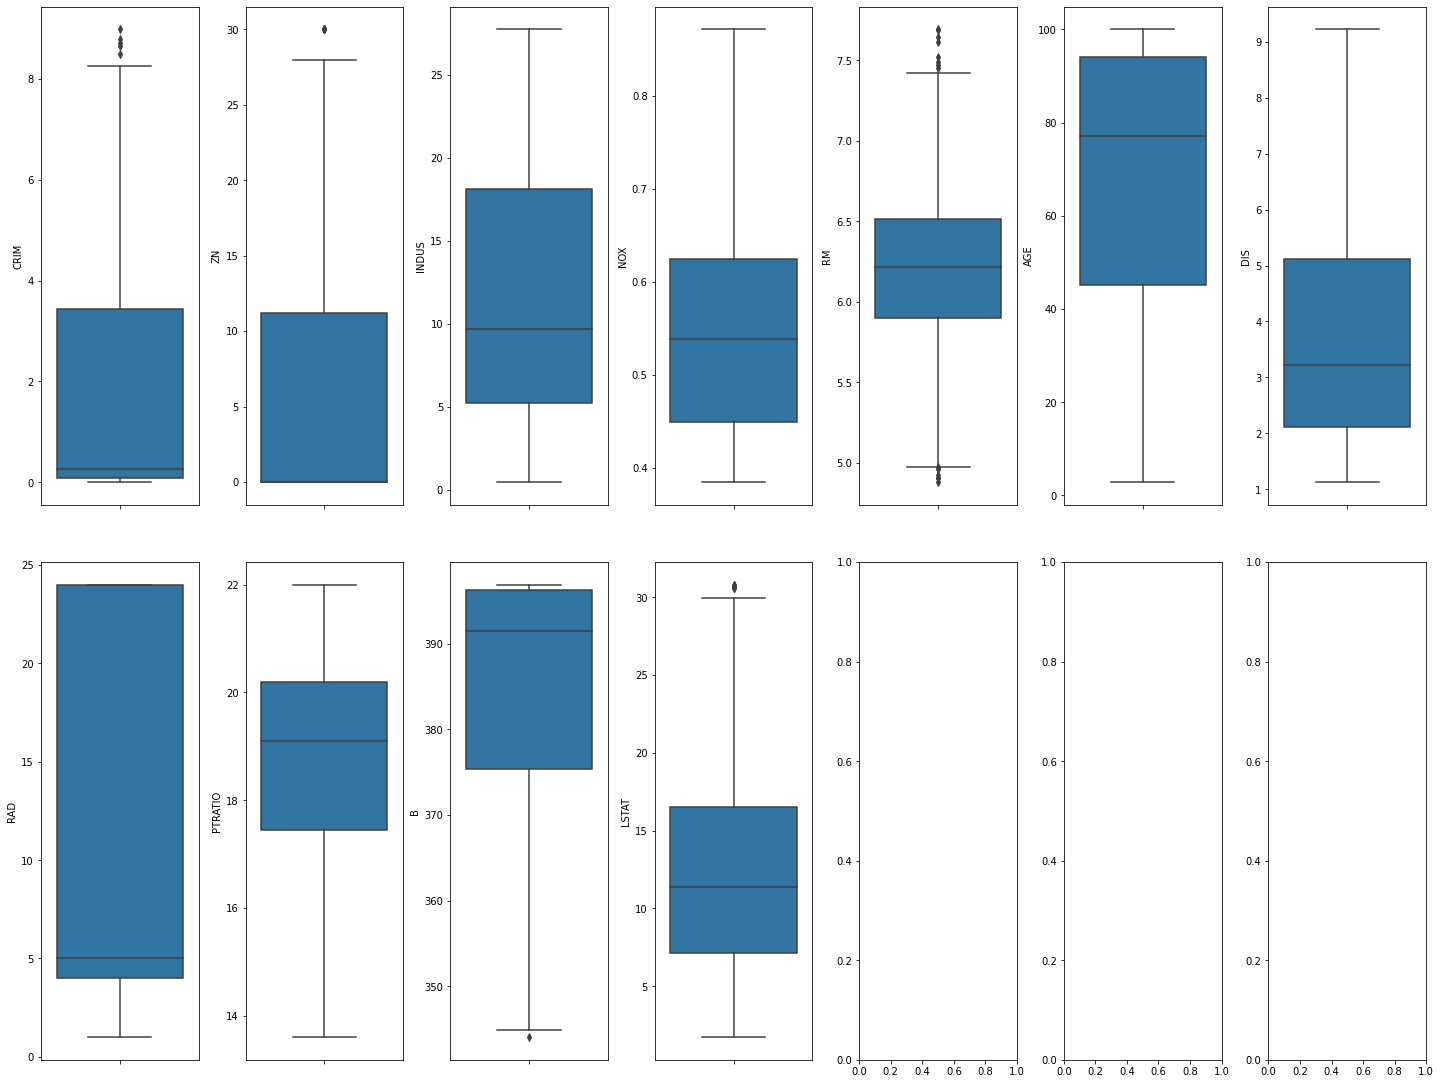

In [732]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 15))
index = 0
ax = ax.flatten()

for col, value in data_X.items():
    sns.boxplot(y=col, data=data_X, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

> There are a lot of outliers in columns : `CRIM, ZN, RM, DIS, B, LSTAT`

In [733]:
# Removing extreme outliers and replacing the mild outliers with mean value
for column in data.columns:
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3 - q1
    not_outliers = len(data[column][((q1- (1.5 *iqr)) < data[column]) & ((q3 + (1.5 * iqr)) > data[column])])
    outliers = len(data[column][((q1- (1.5 *iqr)) >= data[column]) | ((q3 + (1.5 * iqr)) <= data[column])])
    print(f"{column} has {((outliers/data[column].count()) * 100):.02f} % of outliers")
    x = data[column][((q1- (1.5 *iqr)) >= data[column]) | ((q3 + (1.5 * iqr)) <= data[column])]
    if len(x) >= 1 and column != 'CHAS':
        data.drop(x.sort_values(ascending=False).index[0], inplace=True)
        data[column][x.sort_values(ascending=False).index[1:]] = data[column].mean()
    print("After updating/removing outliers : ")
    outliers = len(data[column][((q1- (1.5 *iqr)) >= data[column]) | ((q3 + (1.5 * iqr)) <= data[column])])
    print(f"{column} has {((outliers/data[column].count()) * 100):.02f} % of outliers")
    print("_"*50)

CRIM has 13.04 % of outliers
After updating/removing outliers : 
CRIM has 0.00 % of outliers
__________________________________________________
ZN has 13.47 % of outliers
After updating/removing outliers : 
ZN has 0.00 % of outliers
__________________________________________________
INDUS has 0.00 % of outliers
After updating/removing outliers : 
INDUS has 0.00 % of outliers
__________________________________________________
NOX has 0.00 % of outliers
After updating/removing outliers : 
NOX has 0.00 % of outliers
__________________________________________________
RM has 5.95 % of outliers
After updating/removing outliers : 
RM has 0.00 % of outliers
__________________________________________________
AGE has 0.00 % of outliers
After updating/removing outliers : 
AGE has 0.00 % of outliers
__________________________________________________
RAD has 0.00 % of outliers
After updating/removing outliers : 
RAD has 0.00 % of outliers
__________________________________________________
PTRATIO h

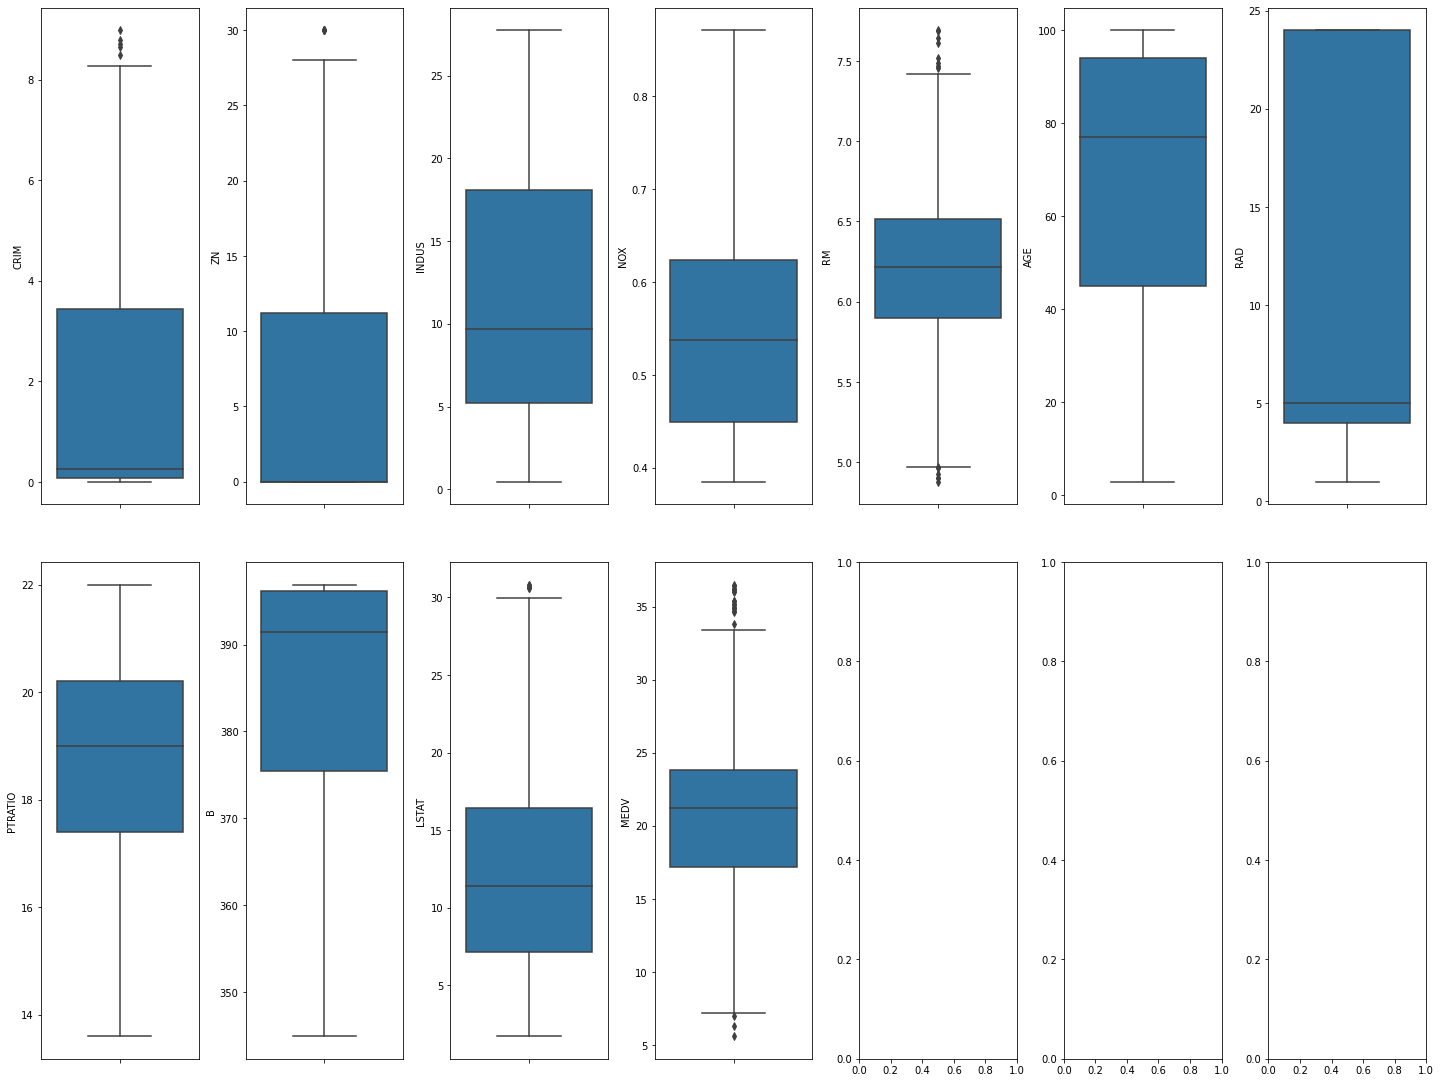

In [734]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 15))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [735]:
data

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,1,21.0,393.45,6.48,22.0


In [529]:
# sns.boxplot(x= 'CHAS', y='AGE', hue = 'CHAS', data=data, palette='Set3')
# sns.boxplot(x= 'RM', data=data)

In [530]:
# sns.displot(data, x='RM', y='AGE', hue='CHAS')

In [736]:
data_X = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [737]:
# Ordinary Least square
model_ols = LinearRegression().fit(data_X, data_y)

In [738]:
model_ols.score(data_X, data_y)

0.6468210554588758

In [739]:
size, train_scores, valid_scores = learning_curve(model_ols, data_X, data_y)

Text(0, 0.5, 'Score')

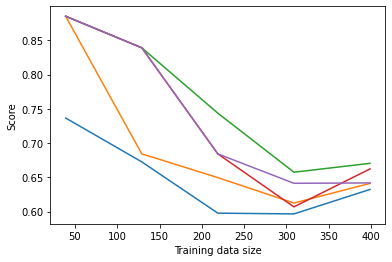

In [740]:
plt.plot(size, train_scores)
plt.xlabel('Training data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

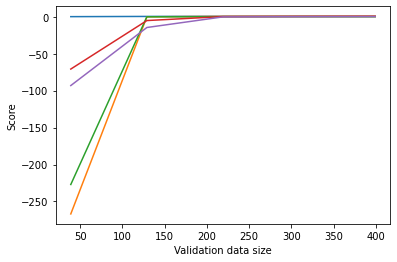

In [741]:
plt.plot(size, valid_scores)
plt.xlabel('Validation data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

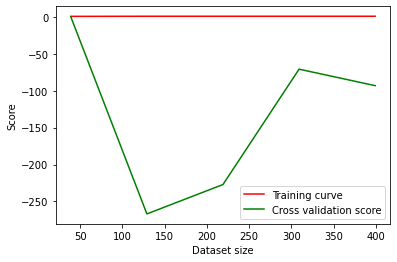

In [742]:
plt.plot(size, train_scores[0], label='Training curve',color='red')
plt.plot(size, valid_scores[0],label='Cross validation score', color='green')
plt.legend()
plt.xlabel('Dataset size')
plt.ylabel('Score')

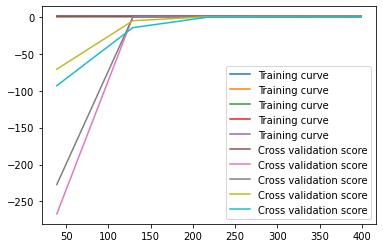

In [743]:
plt.plot(size, train_scores, label='Training curve')
plt.plot(size, valid_scores,label='Cross validation score')
plt.legend()

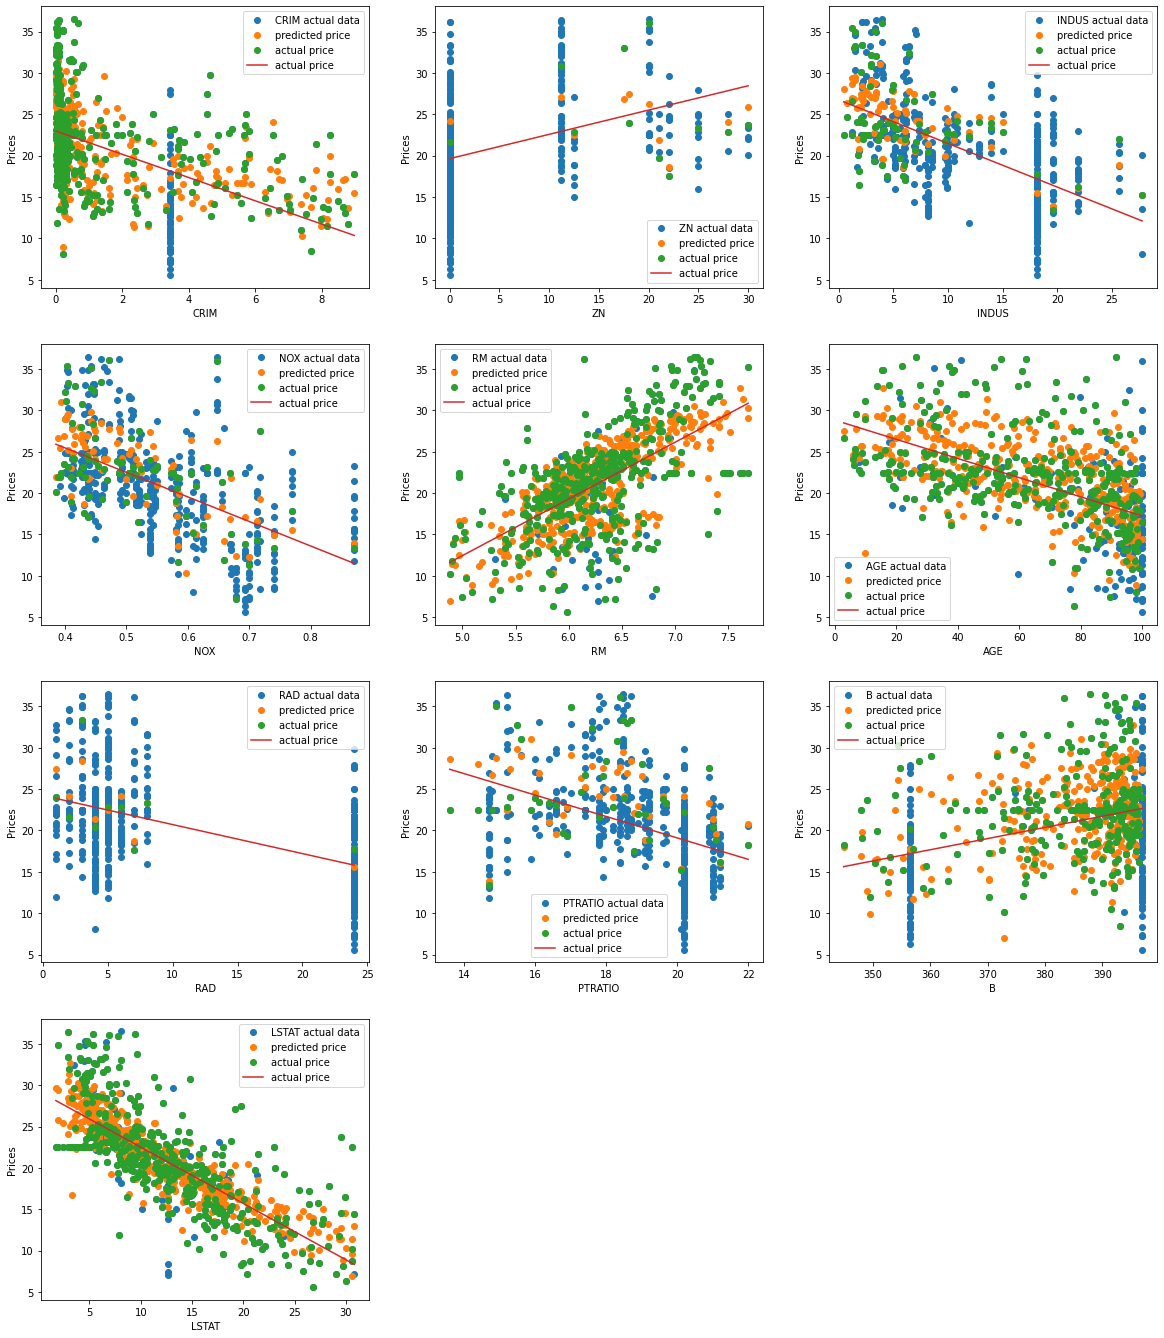

In [747]:
plt.figure(figsize=(20, 30))

for i,column in enumerate(data_X.columns):
    plt.subplot(5,3, i+1)
    plt.plot(data_X[column], data_y,'o', label=f'{column} actual data')
    # scatter plot for predicted data
    plt.plot(data_X.drop_duplicates(subset=[column])[column],
             model_ols.predict(data_X.drop_duplicates(subset=[column])), 'o', label='predicted price')
    # scatter plot for the given data
    plt.plot(data_X.drop_duplicates(subset=[column])[column], 
             data.drop_duplicates(subset=[column])['MEDV'], 'o', label='actual price')
    # straight line for the given data
    plt.plot(np.unique(data_X[column]), np.poly1d(np.polyfit(data_X[column], data_y, 1))(np.unique(data_X[column])), label='actual price')
    plt.xlabel(column)
    plt.ylabel('Prices')
    plt.legend()

In [748]:
linearly_varying_data = data_X
shuffled_X, shuffled_y = shuffle(linearly_varying_data, data_y)
X_train, X_test, y_train, y_test = train_test_split(shuffled_X, shuffled_y, test_size=0.2, random_state=10)
model_ols = LinearRegression().fit(X_train, y_train)
print(f"Training r2_score {model_ols.score(X_train, y_train)}")

Training r2_score 0.6368234483786057


In [749]:
print("Testing data results : ")
rsq_score = r2_score(model_ols.predict(X_test),y_test)
mse = mean_squared_error(model_ols.predict(X_test),y_test)
rmse = mean_squared_error(model_ols.predict(X_test),y_test, squared=False)
mae = mean_absolute_error(model_ols.predict(X_test),y_test)
print(f"R2_Score : {rsq_score} \nMean Squared Error : {mse} \nRoot Mean Squared Error : {rmse}\nMean Absolute Error : {mae}")

Testing data results : 
R2_Score : 0.4013260478792776 
Mean Squared Error : 11.725009078718228 
Root Mean Squared Error : 3.424180059330734
Mean Absolute Error : 2.604121541841814


<AxesSubplot:title={'center':'Ordinary Least Square'}>

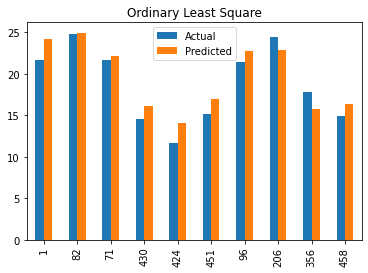

In [750]:
x_compare = pd.DataFrame({'Actual':y_train.head(10), 'Predicted':model_ols.predict(X_train.head(10))})
x_compare.plot(kind='bar', title='Ordinary Least Square')

In [751]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train)

SVR()

In [752]:
model_SVR.score(data_X, data_y)

0.2539453411984015

In [753]:
print("Testing data results : ")
rsq_score = r2_score(model_SVR.predict(X_test),y_test)
mse = mean_squared_error(model_SVR.predict(X_test),y_test)
rmse = mean_squared_error(model_SVR.predict(X_test),y_test, squared=False)
mae = mean_absolute_error(model_SVR.predict(X_test),y_test)
print(f"R2_Score : {rsq_score} \nMean Squared Error : {mse} \nRoot Mean Squared Error : {rmse}\nMean Absolute Error : {mae}")

Testing data results : 
R2_Score : -10.632673949831794 
Mean Squared Error : 26.948112356427426 
Root Mean Squared Error : 5.191157130778015
Mean Absolute Error : 3.8214730637661547


<AxesSubplot:title={'center':'Support Vector Regressor'}>

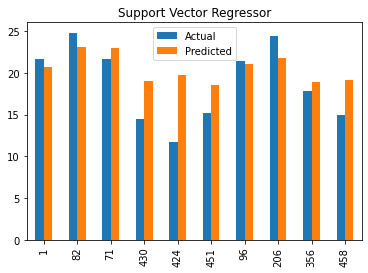

In [754]:
x_compare = pd.DataFrame({'Actual':y_train.head(10), 'Predicted':model_SVR.predict(X_train.head(10))})
x_compare.plot(kind='bar', title='Support Vector Regressor')

In [755]:
model_rfr = RandomForestRegressor(n_estimators=100)

In [756]:
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [757]:
model_rfr.score(X_train, y_train)

0.9594288746125538

In [758]:
print("Testing data results : ")
rsq_score = r2_score(model_rfr.predict(X_test),y_test)
mse = mean_squared_error(model_rfr.predict(X_test),y_test)
rmse = mean_squared_error(model_rfr.predict(X_test),y_test, squared=False)
mae = mean_absolute_error(model_rfr.predict(X_test),y_test)
print(f"R2_Score : {rsq_score} \nMean Squared Error : {mse} \nRoot Mean Squared Error : {rmse}\nMean Absolute Error : {mae}")

Testing data results : 
R2_Score : 0.6055511496189202 
Mean Squared Error : 8.729040694029948 
Root Mean Squared Error : 2.954494998139267
Mean Absolute Error : 2.1793336072144296


In [759]:
model_rfr.score(X_test, y_test)

0.7467593398924233

In [760]:
size, train_scores, valid_scores = learning_curve(model_rfr, data_X, data_y)

Text(0, 0.5, 'Score')

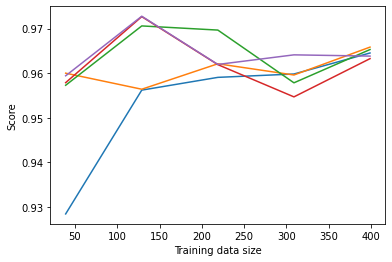

In [761]:
plt.plot(size, train_scores)
plt.xlabel('Training data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

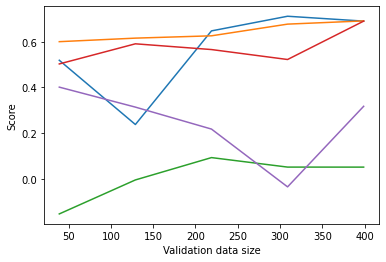

In [762]:
plt.plot(size, valid_scores)
plt.xlabel('Validation data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

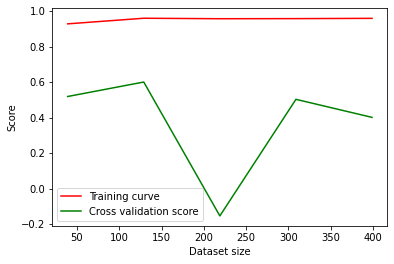

In [763]:
plt.plot(size, train_scores[0], label='Training curve',color='red')
plt.plot(size, valid_scores[0],label='Cross validation score', color='green')
plt.legend()
plt.xlabel('Dataset size')
plt.ylabel('Score')

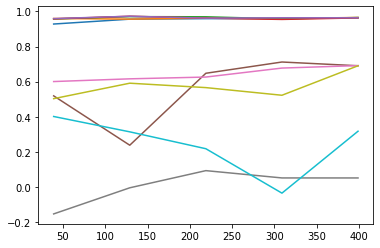

In [764]:
plt.plot(size, train_scores, label='Training curve')
plt.plot(size, valid_scores,label='Cross validation score')
# plt.legend()

<AxesSubplot:title={'center':'Random Forest Regressor'}>

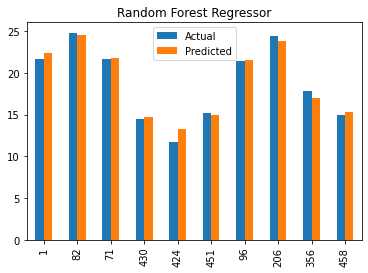

In [765]:
x_compare = pd.DataFrame({'Actual':y_train.head(10), 'Predicted':model_rfr.predict(X_train.head(10))})
x_compare.plot(kind='bar', title='Random Forest Regressor')

In [766]:
model_knn = KNeighborsRegressor(n_neighbors=10)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [767]:
model_knn.score(X_train, y_train)

0.6290202430169143

In [768]:
print("Testing data results : ")
rsq_score = r2_score(model_knn.predict(X_test),y_test)
mse = mean_squared_error(model_knn.predict(X_test),y_test)
rmse = mean_squared_error(model_knn.predict(X_test),y_test, squared=False)
mae = mean_absolute_error(model_knn.predict(X_test),y_test)
print(f"R2_Score : {rsq_score} \nMean Squared Error : {mse} \nRoot Mean Squared Error : {rmse}\nMean Absolute Error : {mae}")

Testing data results : 
R2_Score : 0.22078686700229444 
Mean Squared Error : 16.01640865134678 
Root Mean Squared Error : 4.002050555820951
Mean Absolute Error : 3.1497434869739482


<AxesSubplot:title={'center':'K-Nearest-Neighbour'}>

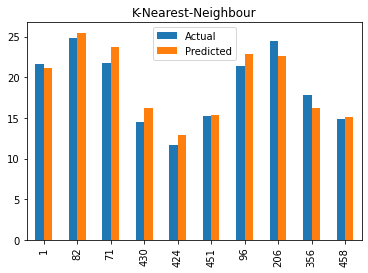

In [769]:
x_compare = pd.DataFrame({'Actual':y_train.head(10), 'Predicted':model_knn.predict(X_train.head(10))})
x_compare.plot(kind='bar', title='K-Nearest-Neighbour')